In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification

##### filepath=(r"C:\Users\sahan\Finaldataset.csv")
df=pd.read_csv(filepath)
df

In [4]:
df.isnull().sum()

District      0
Mandal        0
Date          0
Temp          0
Humidity      0
Wind speed    1
Rainfall      0
dtype: int64

In [5]:
df =df.fillna(0)

In [6]:
df.isnull().sum()

District      0
Mandal        0
Date          0
Temp          0
Humidity      0
Wind speed    0
Rainfall      0
dtype: int64

In [7]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['District'] = label_encoder.fit_transform(df['District'])
df['Mandal'] = label_encoder.fit_transform(df['Mandal'])
df['Date'] = label_encoder.fit_transform(df['Date'])

In [8]:
df

,District,Mandal,Date,Temp,Humidity,Wind speed,Rainfall
0,0,5,0,0.0,42.2,62.7,0
1,0,5,1,0.0,43.0,62.4,0
2,0,5,2,0.0,44.5,55.4,0
3,0,5,3,0.4,44.6,46.8,0
4,0,5,4,0.0,40.8,50.2,0
...,...,...,...,...,...,...,...
17815,32,572,25,8.2,32.7,98.7,1
17816,32,572,26,17.6,30.5,98.8,1
17817,32,572,27,1.7,29.6,97.5,1
17818,32,572,28,0.3,33.1,95.6,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17820 entries, 0 to 17819
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   District    17820 non-null  int32  
 1   Mandal      17820 non-null  int32  
 2   Date        17820 non-null  int32  
 3   Temp        17820 non-null  float64
 4   Humidity    17820 non-null  float64
 5   Wind speed  17820 non-null  float64
 6   Rainfall    17820 non-null  int64  
dtypes: float64(3), int32(3), int64(1)
memory usage: 765.8 KB


In [10]:
df.columns

Index(['District', 'Mandal', 'Date', 'Temp', 'Humidity', 'Wind speed',
       'Rainfall'],
      dtype='object')

In [11]:
df.shape

(17820, 7)

In [12]:
features = list(df.select_dtypes(include = np.number).columns)
print(features)

['District', 'Mandal', 'Date', 'Temp', 'Humidity', 'Wind speed', 'Rainfall']


In [41]:
df.dtypes

District        int32
Mandal          int32
Date            int32
Temp          float64
Humidity      float64
Wind speed    float64
Rainfall        int64
dtype: object

In [42]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
District,17820.0,16.604377,9.433891,0.0,9.0,18.0,25.0,32.0
Mandal,17820.0,290.084175,168.400632,0.0,144.0,290.5,436.0,582.0
Date,17820.0,14.500000,8.655684,0.0,7.0,14.5,22.0,29.0
Temp,17820.0,4.891639,12.233048,0.0,0.0,0.0,3.0,124.3
Humidity,17820.0,36.357267,3.688255,27.3,33.2,35.9,39.2,45.9
Wind speed,17820.0,84.111274,15.343651,0.0,72.9,88.6,98.3,100.0
Rainfall,17820.0,0.329517,0.470051,0.0,0.0,0.0,1.0,1.0


In [13]:
df.nunique()

District       33
Mandal        583
Date           30
Temp          705
Humidity      183
Wind speed    620
Rainfall        2
dtype: int64

In [14]:
df.head

<bound method NDFrame.head of        District  Mandal  Date  Temp  Humidity  Wind speed  Rainfall
0             0       5     0   0.0      42.2        62.7         0
1             0       5     1   0.0      43.0        62.4         0
2             0       5     2   0.0      44.5        55.4         0
3             0       5     3   0.4      44.6        46.8         0
4             0       5     4   0.0      40.8        50.2         0
...         ...     ...   ...   ...       ...         ...       ...
17815        32     572    25   8.2      32.7        98.7         1
17816        32     572    26  17.6      30.5        98.8         1
17817        32     572    27   1.7      29.6        97.5         1
17818        32     572    28   0.3      33.1        95.6         0
17819        32     572    29   0.0      34.4        94.2         0

[17820 rows x 7 columns]>

In [15]:
df.tail

<bound method NDFrame.tail of        District  Mandal  Date  Temp  Humidity  Wind speed  Rainfall
0             0       5     0   0.0      42.2        62.7         0
1             0       5     1   0.0      43.0        62.4         0
2             0       5     2   0.0      44.5        55.4         0
3             0       5     3   0.4      44.6        46.8         0
4             0       5     4   0.0      40.8        50.2         0
...         ...     ...   ...   ...       ...         ...       ...
17815        32     572    25   8.2      32.7        98.7         1
17816        32     572    26  17.6      30.5        98.8         1
17817        32     572    27   1.7      29.6        97.5         1
17818        32     572    28   0.3      33.1        95.6         0
17819        32     572    29   0.0      34.4        94.2         0

[17820 rows x 7 columns]>

In [44]:
df.corr()

,District,Mandal,Date,Temp,Humidity,Wind speed,Rainfall
District,1.000000e+00,1.027319e-01,-1.287046e-15,-0.047029,-0.071027,0.027852,-0.011857
Mandal,1.027319e-01,1.000000e+00,-1.871277e-16,-0.012547,-0.007523,-0.003408,0.004237
Date,-1.287046e-15,-1.871277e-16,1.000000e+00,0.200937,-0.774254,0.696107,0.328034
Temp,-4.702862e-02,-1.254653e-02,2.009368e-01,1.000000,-0.167931,0.351595,0.564529
Humidity,-7.102679e-02,-7.523423e-03,-7.742536e-01,-0.167931,1.000000,-0.667347,-0.313602
Wind speed,2.785167e-02,-3.408028e-03,6.961069e-01,0.351595,-0.667347,1.000000,0.533902
Rainfall,-1.185701e-02,4.237318e-03,3.280337e-01,0.564529,-0.313602,0.533902,1.000000


<AxesSubplot:>

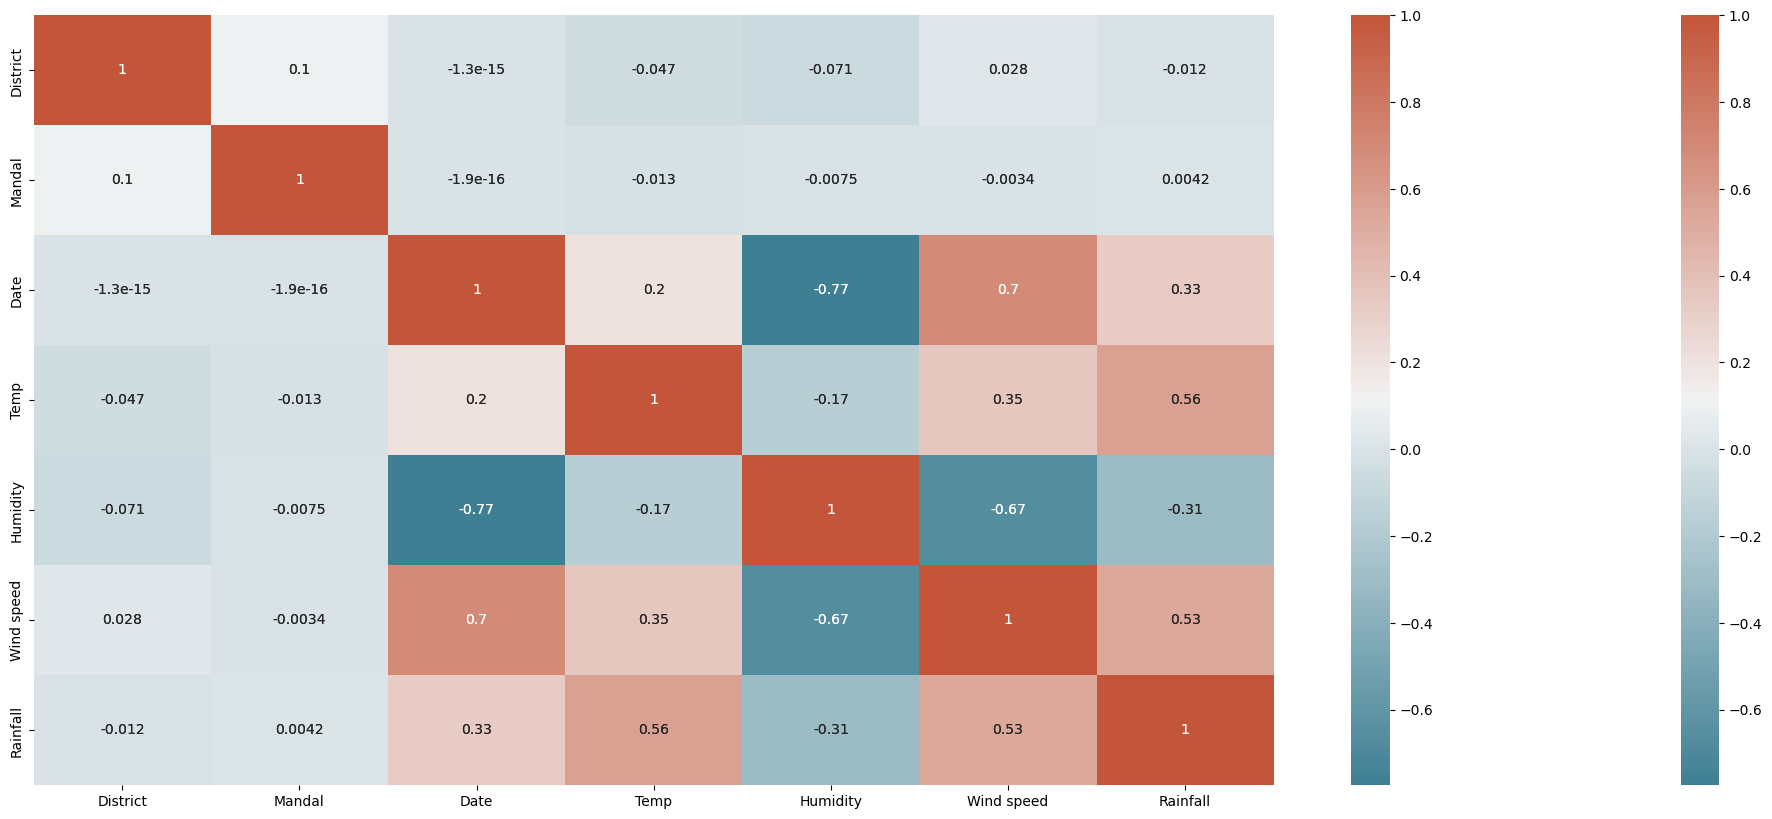

In [45]:
corr = df.corr()
plt.subplots(figsize=(25,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))


<AxesSubplot:>

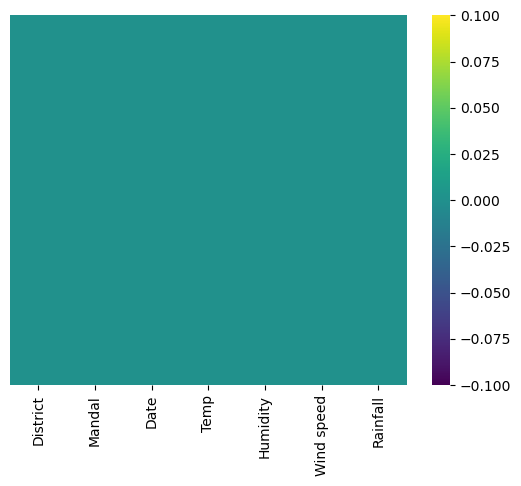

In [46]:
sns.heatmap(df.isnull(),yticklabels=False, cmap="viridis")

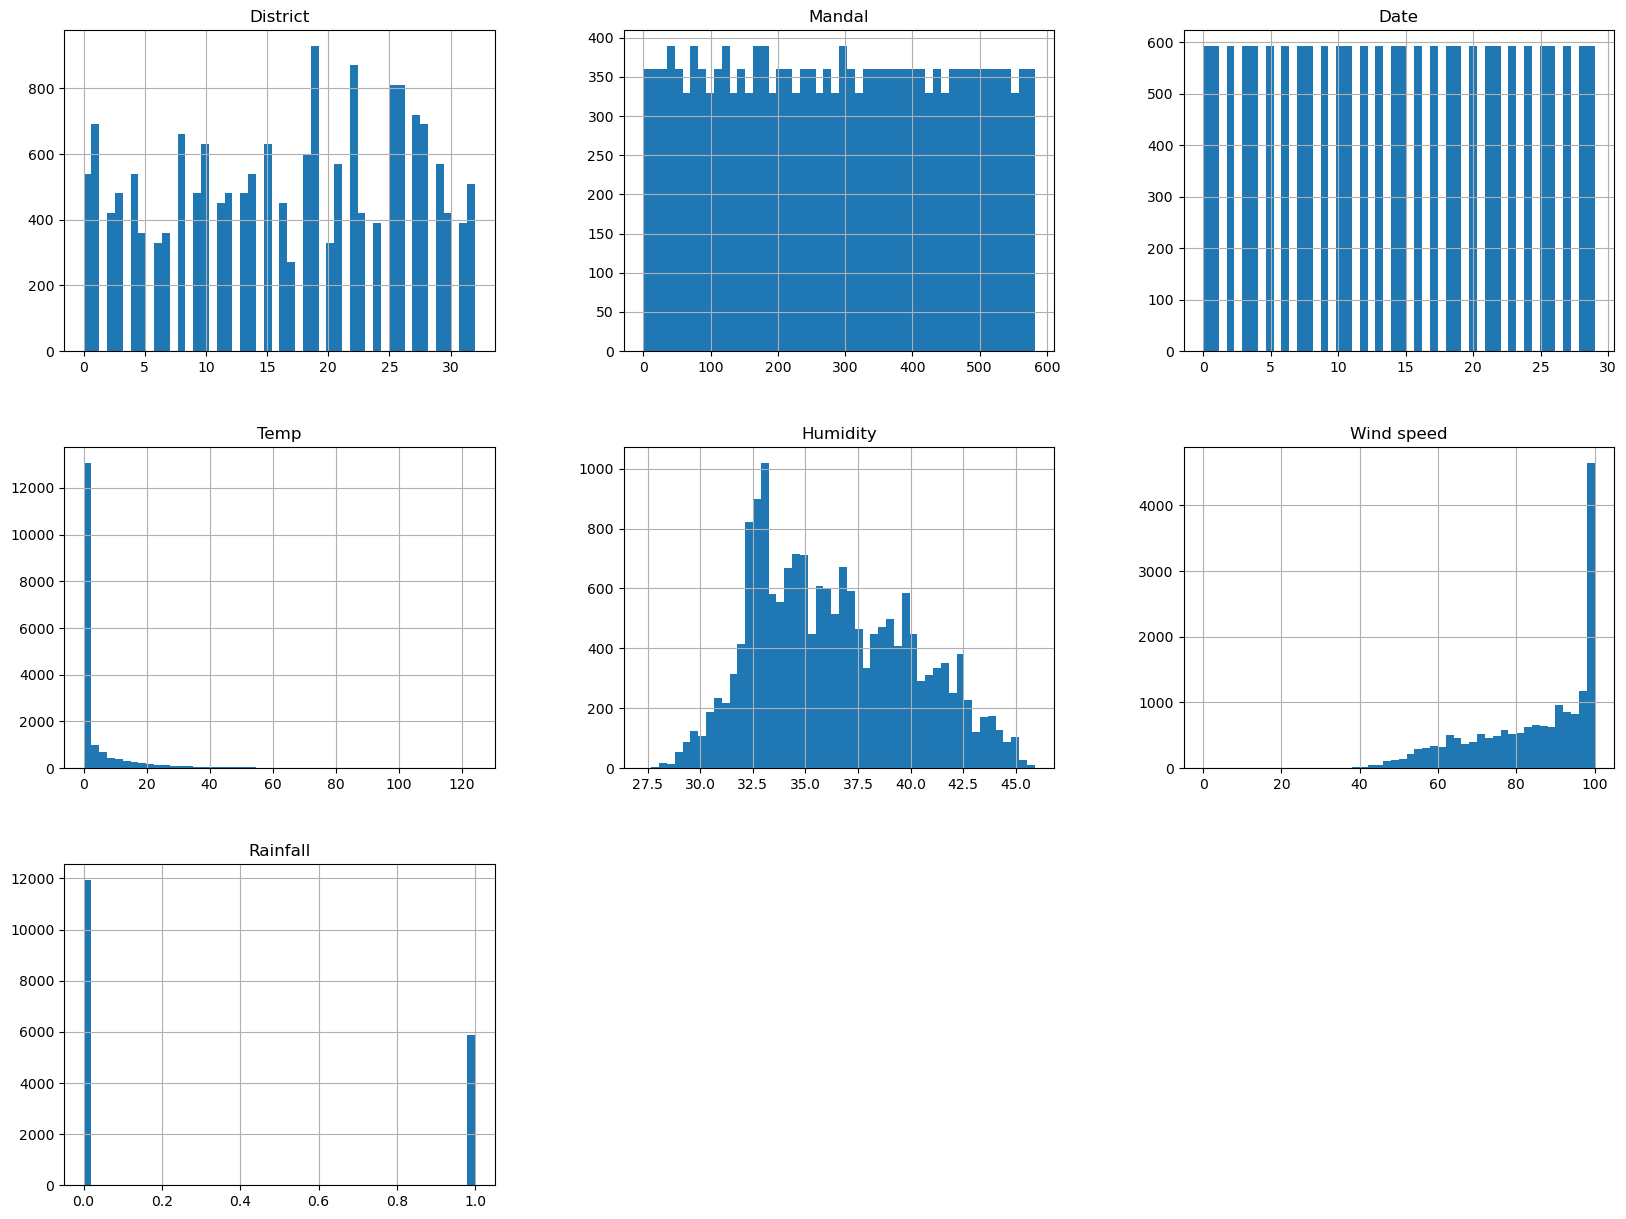

In [47]:
df.hist(bins=50, figsize=(20,15))
plt.show()

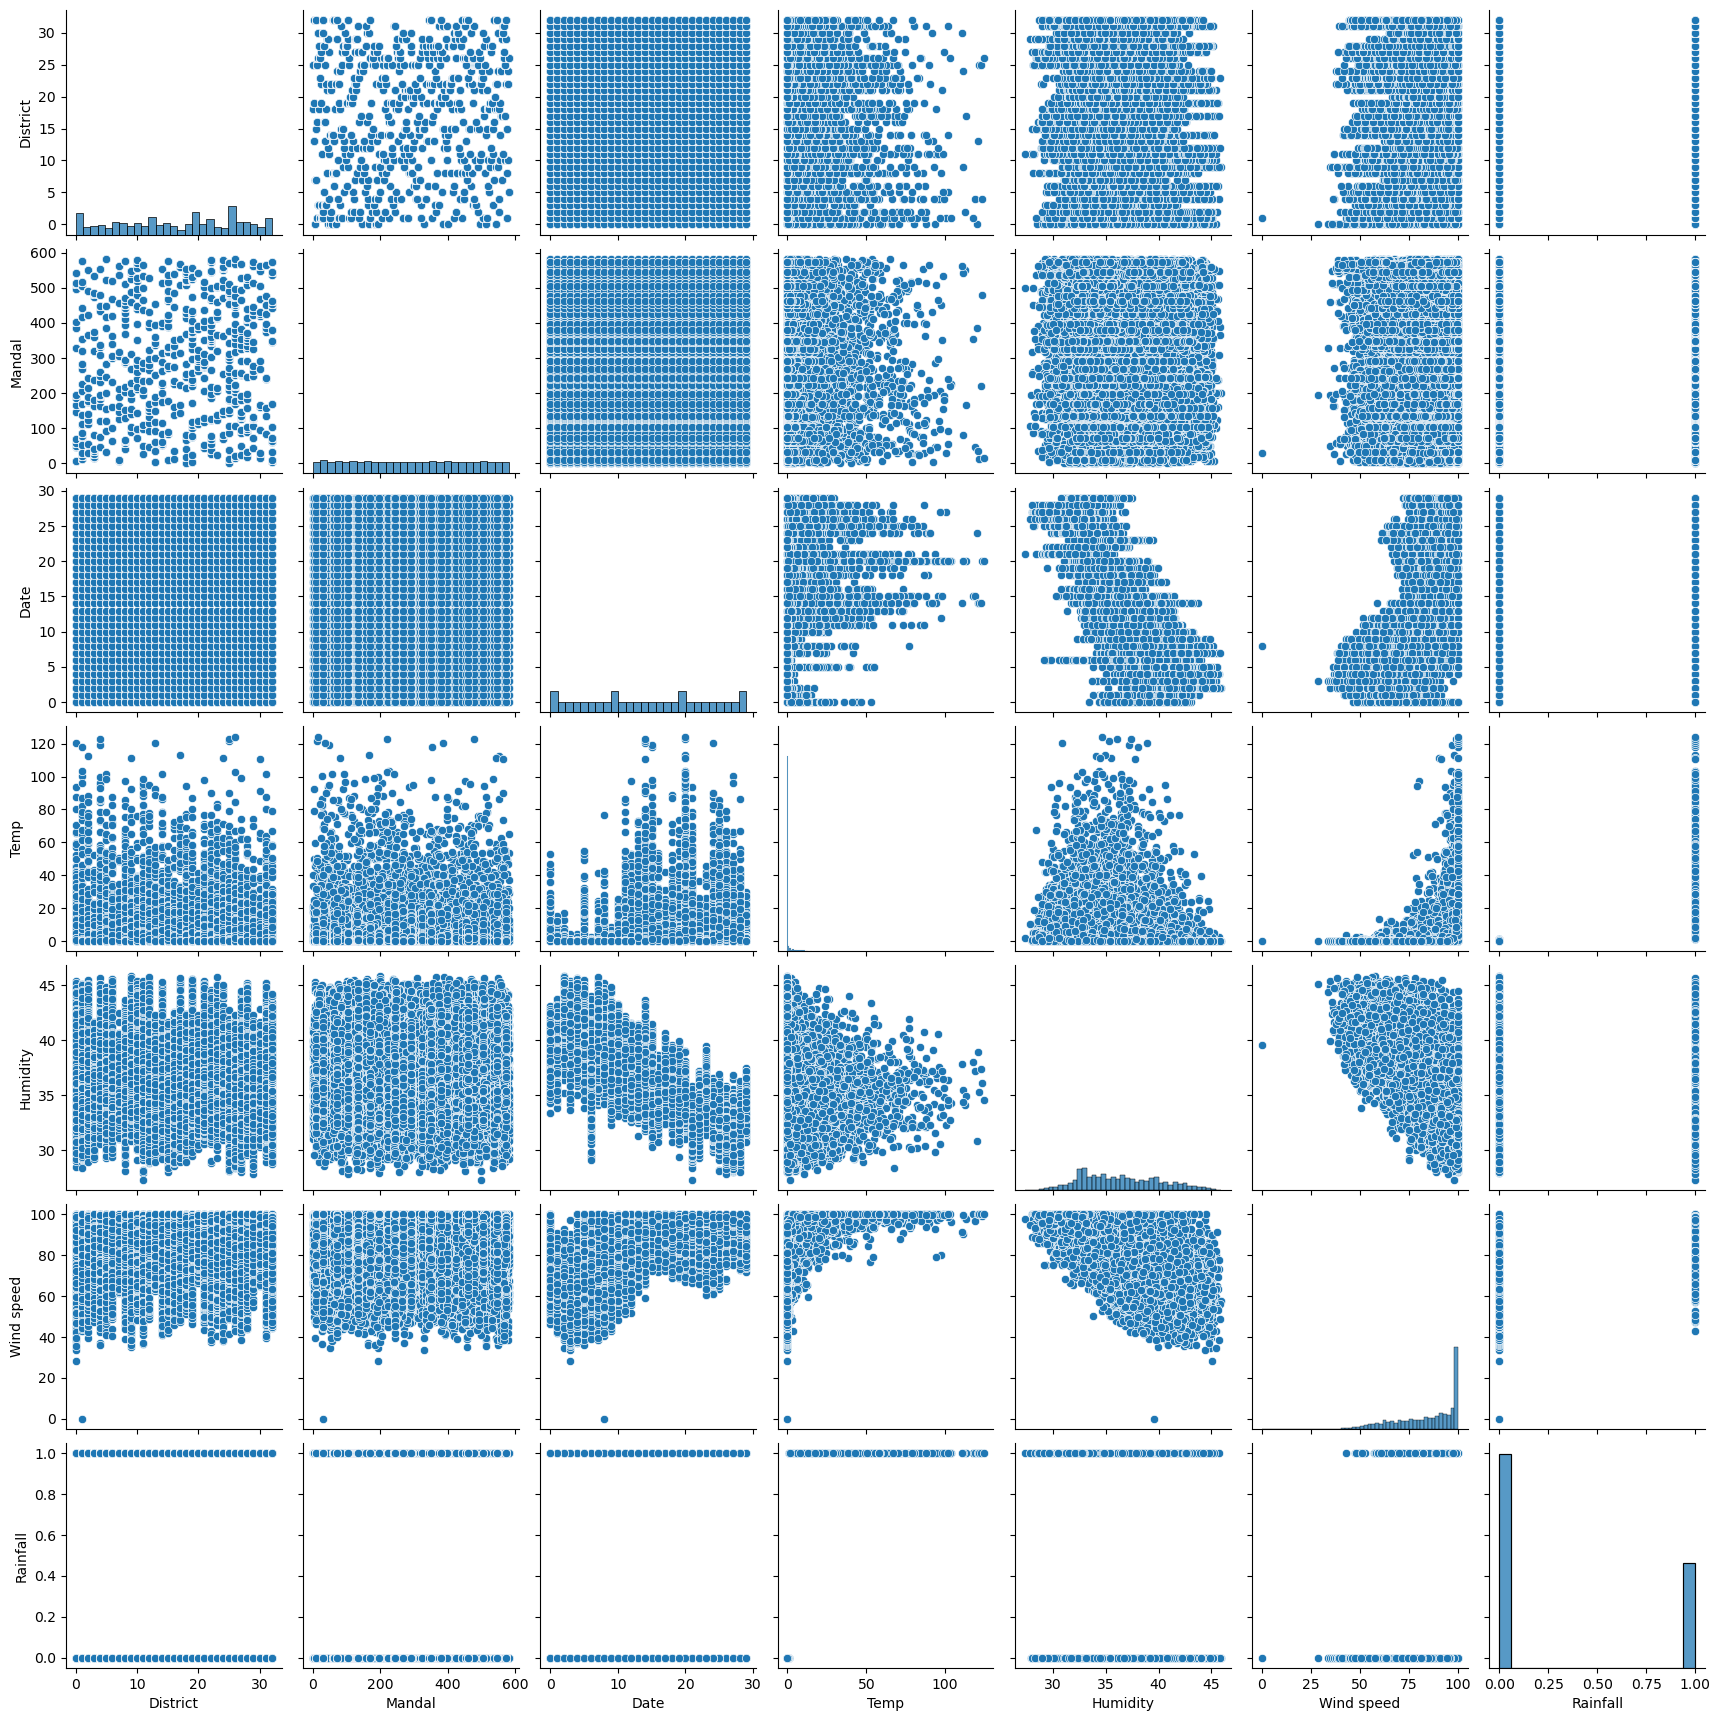

In [48]:
subData=df[['District', 'Mandal', 'Date', 'Temp', 'Humidity', 'Wind speed',
       'Rainfall' ]]
sns.pairplot(subData)

C:\Users\sahan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sahan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sahan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sahan\anaconda3\lib\si

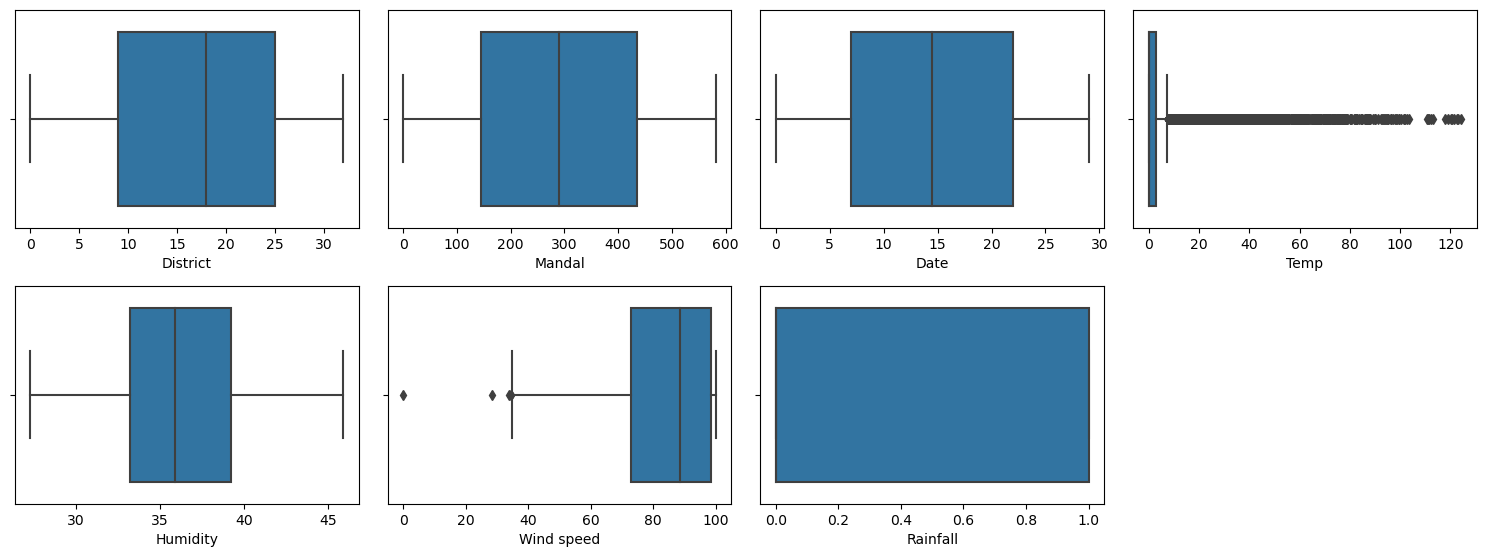

In [49]:
plt.subplots(figsize=(15,8))

for i, col in enumerate(features):
  plt.subplot(3,4, i + 1)
  sb.boxplot(df[col])
plt.tight_layout()
plt.show()

In [50]:
from math import log
eps=np.finfo(float).eps
def ent(df,attribute):
    target_variables=df.Rainfall.unique()
    variables=df[attribute].unique()
    
    entropy_attribute=0
    for variable in variables:
        entropy_each_feature=0
        for target_variable in target_variables:
            num=len(df[attribute][df[attribute]==variable][df.Rainfall==target_variable])
            den=len(df[attribute][df[attribute]==variable])
            fraction=num/(den+eps)
            entropy_each_feature+=-fraction*log(fraction+eps)
        fraction2=den/len(df)
        entropy_attribute+=-fraction2*entropy_each_feature
    
    return(abs(entropy_attribute))

In [51]:
a_entropy={k:ent(df,k) for k in df.keys()[:-1]}
a_entropy

{'District': 0.6278330681128235,
 'Mandal': 0.6178499968002813,
 'Date': 0.47431655631845837,
 'Temp': 2.1936561558390316e-16,
 'Humidity': 0.572985977190062,
 'Wind speed': 0.41618594518971946}

[0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0]


[Text(0.5, 0.9, 'X[4] <= -0.6\ngini = 0.491\nsamples = 74\nvalue = [32, 42]'),
 Text(0.2, 0.7, 'X[2] <= -0.822\ngini = 0.117\nsamples = 32\nvalue = [30, 2]'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3, 0.5, 'X[3] <= 1.441\ngini = 0.062\nsamples = 31\nvalue = [30, 1]'),
 Text(0.2, 0.3, 'gini = 0.0\nsamples = 30\nvalue = [30, 0]'),
 Text(0.4, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.7, 'X[2] <= 1.051\ngini = 0.091\nsamples = 42\nvalue = [2, 40]'),
 Text(0.7, 0.5, 'X[4] <= -0.157\ngini = 0.048\nsamples = 41\nvalue = [1, 40]'),
 Text(0.6, 0.3, 'X[3] <= -0.121\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.7, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8, 0.3, 'gini = 0.0\nsamples = 38\nvalue = [0, 38]'),
 Text(0.9, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

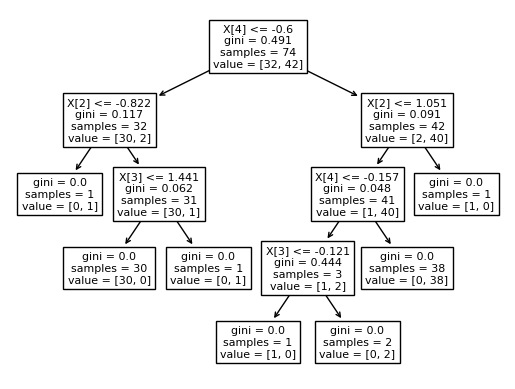

In [57]:

X, t = make_classification(100, 5, n_classes=2, shuffle=True, random_state=10)
X_train, X_test, t_train, t_test = train_test_split(
    X, t, test_size=0.26, shuffle=True, random_state=1)
 
model = tree.DecisionTreeClassifier()
model = model.fit(X_train, t_train)
 
predicted_value = model.predict(X_test)
print(predicted_value)
 
tree.plot_tree(model)

In [58]:
zeroes = 0
ones = 0
for i in range(0, len(t_train)):
    if t_train[i] == 0:
        zeroes += 1
    else:
        ones += 1
 
print(zeroes)
print(ones)
 
val = 1 - ((zeroes/70)*(zeroes/70) + (ones/70)*(ones/70))
print("Gini :", val)
 

32
42
Gini : 0.43102040816326537


In [59]:
match = 0
UnMatch = 0
 
for i in range(25):
    if predicted_value[i] == t_test[i]:
        match += 1
    else:
        UnMatch += 1
 
accuracy = match/25
print("Accuracy is: ", accuracy)

Accuracy is:  0.84


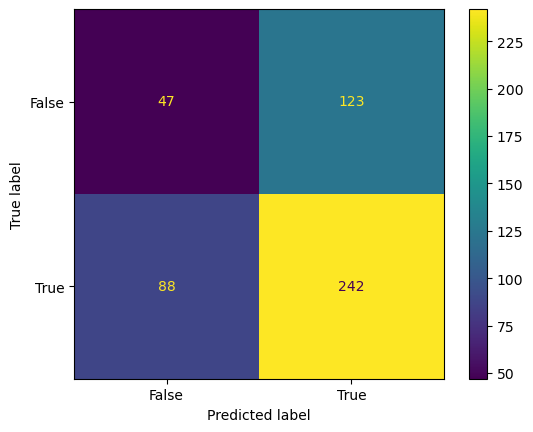

In [60]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = numpy.random.binomial(1,.7,size = 500)
predicted = numpy.random.binomial(1,.7,size = 500)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()